# Cover the basics of merging and joining dataframes in Pandas
- Look up the basics of sql relational algebra
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging

## Load data of top billboard artists in last
- tracks: The Hot 100 for every week the chart's been released
- artists: One or more credited artists for each track from the tracks data
- https://www.kaggle.com/dylanburati/billboard-hot-100-full-history

In [1]:
import pandas as pd
tracks = pd.read_csv("billboard/tracks.csv")
artists = pd.read_csv("billboard/artists.csv")


In [4]:
pd.read_csv('ml-100k/u.data',sep='\t',header=None)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
artists.head()

,song_id,artist_id,artist,ordinal
0,581724,13343,Ricky Nelson,1
1,572037,22680,Perez Prado,1
2,577084,98356,Bobby Darin,1
3,575171,1035,Elvis Presley,1
4,580391,99328,Kalin Twins,1


## Merging Dataframes
- pandas.merge connects rows in DataFrames based on one or more keys, Most closely related to sql joins
- Merge or join operations combine datasets by linking rows using one or more keys.

In [54]:
pd.merge(tracks, artists).head()

,song_id,rank,date,artist,song,last_week,weeks_on_chart,peak_rank,artist_id,ordinal
0,581724,1,1958-08-04,Ricky Nelson,Poor Little Fool,NaN,1,1,13343,1
1,581724,1,1958-08-11,Ricky Nelson,Poor Little Fool,1.0,2,1,13343,1
2,581724,4,1958-08-18,Ricky Nelson,Poor Little Fool,1.0,3,1,13343,1
3,581724,6,1958-08-25,Ricky Nelson,Poor Little Fool,4.0,4,1,13343,1
4,581724,5,1958-09-01,Ricky Nelson,Poor Little Fool,6.0,5,1,13343,1


## The merged dataframe has artist_id information together with the song information
- if the key is not specified, merge will join on what it thinks is the most closely related key
- better to specify the join key
- by default `merge` is an inner join
- the merged dataset drops common columns by default

In [55]:
pd.merge(tracks, artists,on='song_id').head()

,song_id,rank,date,artist_x,song,last_week,weeks_on_chart,peak_rank,artist_id,artist_y,ordinal
0,581724,1,1958-08-04,Ricky Nelson,Poor Little Fool,NaN,1,1,13343,Ricky Nelson,1
1,581724,1,1958-08-11,Ricky Nelson,Poor Little Fool,1.0,2,1,13343,Ricky Nelson,1
2,581724,4,1958-08-18,Ricky Nelson,Poor Little Fool,1.0,3,1,13343,Ricky Nelson,1
3,581724,6,1958-08-25,Ricky Nelson,Poor Little Fool,4.0,4,1,13343,Ricky Nelson,1
4,581724,5,1958-09-01,Ricky Nelson,Poor Little Fool,6.0,5,1,13343,Ricky Nelson,1


## When the index is specified, common columns are not dropped by default
- `suffix` argument lets you specify the identifier for the left and right common columns
- default suffix is. `_x`,`_y`

In [56]:
pd.merge(tracks, artists,on='song_id', suffixes=('_left', '_right')).head()

,song_id,rank,date,artist_left,song,last_week,weeks_on_chart,peak_rank,artist_id,artist_right,ordinal
0,581724,1,1958-08-04,Ricky Nelson,Poor Little Fool,NaN,1,1,13343,Ricky Nelson,1
1,581724,1,1958-08-11,Ricky Nelson,Poor Little Fool,1.0,2,1,13343,Ricky Nelson,1
2,581724,4,1958-08-18,Ricky Nelson,Poor Little Fool,1.0,3,1,13343,Ricky Nelson,1
3,581724,6,1958-08-25,Ricky Nelson,Poor Little Fool,4.0,4,1,13343,Ricky Nelson,1
4,581724,5,1958-09-01,Ricky Nelson,Poor Little Fool,6.0,5,1,13343,Ricky Nelson,1



## You can specify the left key column and the right key column separately


In [57]:
pd.merge(tracks, artists.rename(columns={'song_id':'song_index'})
         ,left_on='song_id',right_on='song_index').head()

,song_id,rank,date,artist_x,song,last_week,weeks_on_chart,peak_rank,song_index,artist_id,artist_y,ordinal
0,581724,1,1958-08-04,Ricky Nelson,Poor Little Fool,NaN,1,1,581724,13343,Ricky Nelson,1
1,581724,1,1958-08-11,Ricky Nelson,Poor Little Fool,1.0,2,1,581724,13343,Ricky Nelson,1
2,581724,4,1958-08-18,Ricky Nelson,Poor Little Fool,1.0,3,1,581724,13343,Ricky Nelson,1
3,581724,6,1958-08-25,Ricky Nelson,Poor Little Fool,4.0,4,1,581724,13343,Ricky Nelson,1
4,581724,5,1958-09-01,Ricky Nelson,Poor Little Fool,6.0,5,1,581724,13343,Ricky Nelson,1


## Joins can be performed on multiple keys
- note the alternative way to use `merge` with `df1.merge(df2)`
- Now we join `song_id`, but also when `rank` is equal to `ordinal`

In [90]:
tracks.merge(artists, left_on=['song_id','rank'],right_on=['song_id','ordinal']).head()

,song_id,rank,date,artist_x,song,last_week,weeks_on_chart,peak_rank,artist_id,artist_y,ordinal
0,581724,1,1958-08-04,Ricky Nelson,Poor Little Fool,NaN,1,1,13343,Ricky Nelson,1
1,581724,1,1958-08-11,Ricky Nelson,Poor Little Fool,1.0,2,1,13343,Ricky Nelson,1
2,581513,1,1958-08-18,Domenico Modugno,Nel Blu Dipinto Di Blu (Volaré),2.0,3,1,98705,Domenico Modugno,1
3,581513,1,1958-09-01,Domenico Modugno,Nel Blu Dipinto Di Blu (Volaré),2.0,5,1,98705,Domenico Modugno,1
4,581513,1,1958-09-08,Domenico Modugno,Nel Blu Dipinto Di Blu (Volaré),1.0,6,1,98705,Domenico Modugno,1


## The above joins have been inner joins so far
- `how` keyword specifies the type join
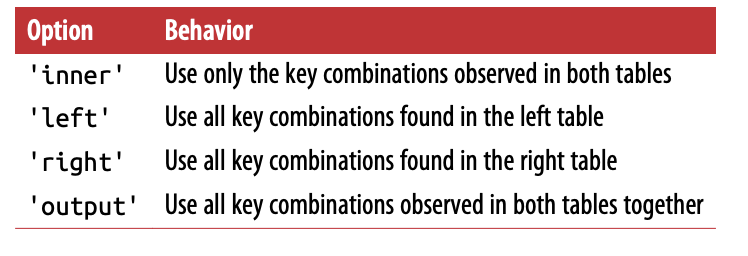

## The row counts tells us that there's information for tracks that's missing in artists and vice versa
- As usual be careful with outer joins as the resulting dataframe could be too large for your computer memory to handle

In [85]:
inner_join = pd.merge(tracks, artists)
right_join = pd.merge(tracks, artists,how='right')
left_join = pd.merge(tracks, artists,how='left')
outer_join = pd.merge(tracks, artists,how='outer') # be careful 
print(len(inner_join),len(left_join) ,len(right_join),len(outer_join))

275177 329608 284567 338998


# Pandas also has a .join method 
- `.join` is used specifically for joininng on indexes
- if columns overlap, a suffix must be specified

In [91]:
tracks.set_index('song_id').join(artists.set_index('song_id'),lsuffix='_left').head()

,rank,date,artist_left,song,last_week,weeks_on_chart,peak_rank,artist_id,artist,ordinal
song_id,,,,,,,,,,
11,82,1990-05-05,Billy Joel,"The Downeaster ""Alexa""",NaN,1,82,109,Billy Joel,16052
11,71,1990-05-12,Billy Joel,"The Downeaster ""Alexa""",82.0,2,71,109,Billy Joel,16052
11,66,1990-05-19,Billy Joel,"The Downeaster ""Alexa""",71.0,3,66,109,Billy Joel,16052
11,62,1990-05-26,Billy Joel,"The Downeaster ""Alexa""",66.0,4,62,109,Billy Joel,16052
11,57,1990-06-02,Billy Joel,"The Downeaster ""Alexa""",62.0,5,57,109,Billy Joel,16052


# Sometimes we want to stack dataframes together. 
- horizontal stacking is the same as a join on index, with the index mapping being one to one
- usual case of horizontal stacking is combining multiple columns together
- vertical stacking, i.e combining a collection of rows  similar to `Union` in SQL
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html?highlight=concat
## .concat method handles both kinds
- Below, we create two derived columns from the `artist` column

In [108]:
name, surname = artists.artist.str.split().str[0], artists.artist.str.split().str[1]
name.rename('first_name',inplace=True)
surname.rename('second_name',inplace=True)
name.head()

0    Ricky
1    Perez
2    Bobby
3    Elvis
4    Kalin
Name: first_name, dtype: object

In [110]:
surname.head()

0     Nelson
1      Prado
2      Darin
3    Presley
4      Twins
Name: second_name, dtype: object

## Horizontal concatenation
- key is assumed to be the native index. 
- the index can ignored with `ignore_index=True`
- specify axis=1 to specify columnwise binding

In [119]:
pd.concat([artists, name,surname],axis=1).head()

,song_id,artist_id,artist,ordinal,first_name,second_name
0,581724,13343,Ricky Nelson,1,Ricky,Nelson
1,572037,22680,Perez Prado,1,Perez,Prado
2,577084,98356,Bobby Darin,1,Bobby,Darin
3,575171,1035,Elvis Presley,1,Elvis,Presley
4,580391,99328,Kalin Twins,1,Kalin,Twins


## Make sure the lengths match
- if the data to be added does not match the row length, there will be lots of nulls

In [115]:
pd.concat([artists, name.loc[:3],surname],axis=1).head(10)

,song_id,artist_id,artist,ordinal,first_name,second_name
0,581724,13343,Ricky Nelson,1,Ricky,Nelson
1,572037,22680,Perez Prado,1,Perez,Prado
2,577084,98356,Bobby Darin,1,Bobby,Darin
3,575171,1035,Elvis Presley,1,Elvis,Presley
4,580391,99328,Kalin Twins,1,NaN,Twins
5,570634,4298,Duane Eddy,1,NaN,Eddy
6,580582,100206,The Coasters,1,NaN,Coasters
7,578872,99099,Jack Scott,1,NaN,Scott
8,577259,100430,The Johnny Otis Show,1,NaN,Johnny
9,575127,93651,Peggy Lee,1,NaN,Lee


## Vertical stacking
- Columns should be the same in both dataframes
- the example below we take the first 3 rows and  stack them top of each other
- note the duplicated indices

In [120]:
pd.concat([artists.loc[:2],artists.loc[:2]]).head(10)

,song_id,artist_id,artist,ordinal
0,581724,13343,Ricky Nelson,1
1,572037,22680,Perez Prado,1
2,577084,98356,Bobby Darin,1
0,581724,13343,Ricky Nelson,1
1,572037,22680,Perez Prado,1
2,577084,98356,Bobby Darin,1
